# ***Inversion of Dirac Matrix***

*   Authors: *Dhruv Patel and Anselem Okeke*
*   Matriculation no.'s: *2130292 and 1943585*
*   Subject: *Introduction to Computer Simulation II*
*   Semester: *Winter Term 2022/2023*
*   Date: *30th January, 2023*

---------

In [ ]:
import numpy as np

def create_lattice(N1, N2):
    lattice = np.zeros((N1, N2), dtype=complex)
    return lattice

def create_gauge_field(lattice, a):
    N1, N2 = lattice.shape
    for i in range(N1):
        for j in range(N2):
            lattice[i][j] = np.exp(1j * a[i][j])
    return lattice

N1 = 10
N2 = 10
lattice = create_lattice(N1, N2)
a = np.random.rand(N1, N2)
gauge_field = create_gauge_field(lattice, a)

In [ ]:
import numpy as np

def create_dirac_matrix(N1, N2, m, U1, U2):
    Dxy = np.zeros((N1*N2, N1*N2), dtype=complex)
    for x1 in range(N1):
        for x2 in range(N2):
            x = x1 * N2 + x2
            for y1 in range(N1):
                for y2 in range(N2):
                    y = y1 * N2 + y2
                    if x1 == y1 and x2 == y2:
                        Dxy[x][y] = m
                    if x1 + 1 == y1 and x2 == y2:
                        Dxy[x][y] += U1[x1][x2]
                    if x1 - 1 == y1 and x2 == y2:
                        Dxy[x][y] -= np.conj(U1[y1][y2])
                    if x1 == y1 and x2 + 1 == y2:
                        if (x1 + x2) % 2 == 0:
                            Dxy[x][y] += U2[x1][x2]
                        else:
                            Dxy[x][y] -= np.conj(U2[y1][y2])
                    if x1 == y1 and x2 - 1 == y2:
                        if (x1 + x2) % 2 == 0:
                            Dxy[x][y] -= np.conj(U2[y1][y2])
                        else:
                            Dxy[x][y] += U2[x1][x2]
    return Dxy

N1 = 10
N2 = 10
m = 1.0
U1 = np.random.rand(N1, N2)
U2 = np.random.rand(N1, N2)
Dxy = create_dirac_matrix(N1, N2, m, U1, U2)

In [ ]:
import numpy as np

def construct_neighbor_table(N1, N2):
    n = np.zeros((4, N1*N2), dtype=int)
    for x1 in range(N1):
        for x2 in range(N2):
            x = x1*N2 + x2
            n[0,x] = x + (-1)*(x1+1)*N2 if x1 < N1-1 else x + (-1)*(x1+1)*N2 - N1*N2
            n[1,x] = x - (-1)*(x1+1)*N2 if x1 > 0 else x - (-1)*(x1+1)*N2 + N1*N2
            n[2,x] = x + 1 if x2 < N2-1 else x + 1 - N2
            n[3,x] = x - 1 if x2 > 0 else x - 1 + N2
    return n

In [ ]:
N1 = 10
N2 = 20
neighbor_table = construct_neighbor_table(N1, N2)

In [ ]:
import numpy as np

def apply_matrix(v, N1, N2, neighbor_table):
    v_new = np.zeros_like(v)
    m = 0.4
    for x in range(N1*N2):
        v_new[x] += m*v[x]
        for mu in range(4):
            nx = neighbor_table[mu, x]
            if nx != -1:
                if mu == 0 or mu == 1:
                    v_new[nx] += v[x]
                else:
                    if (x//N2)%2 == 0:
                        v_new[nx] -= v[x]
                    else:
                        v_new[nx] += v[x]
    return v_new

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N1, N2 = 8, 8
neighbor_table = construct_neighbor_table(N1, N2)

matrix = np.zeros((N1*N2, N1*N2), dtype=np.complex64)
for i in range(N1*N2):
    e = np.zeros((N1*N2), dtype=np.complex64)
    e[i] = 1.0
    matrix[:, i] = apply_matrix(e, N1, N2, neighbor_table)

magnitudes = np.abs(matrix)
plt.imshow(magnitudes, cmap='hot')
plt.show()

IndexError: ignored

In [ ]:
def CG(A, b, tol, max_iter):
    # Initialize x and residual
    x = np.zeros_like(b)
    r = b - np.dot(A, x)
    p = r.copy()
    for i in range(max_iter):
        # Calculate alpha
        alpha = np.dot(r, r) / np.dot(np.dot(A, p), p)
        # Update x and residual
        x = x + alpha * p
        r = b - np.dot(A, x)
        # Check for convergence
        if np.linalg.norm(r) < tol:
            break
        # Update direction
        beta = np.dot(r, r) / np.dot(r, p)
        p = r + beta * p
    return x

def calculate_D_inv(D, tol, max_iter):
    N = D.shape[0]
    D_inv = np.zeros((N, N))
    for i in range(N):
        ei = np.zeros
        ei[i] = 1
        D_star_ei = np.dot(D.conj().T, ei)
        D_star_D = np.dot(D.conj().T, D)
        r = CG(D_star_D, D_star_ei, tol, max_iter)
        D_inv[:, i] = r
    return D_inv

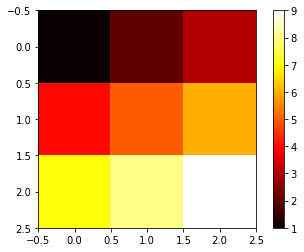

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_matrix(matrix):
    plt.imshow(np.abs(matrix), cmap='hot')
    plt.colorbar()
    plt.show()

# Example matrix
D = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

plot_matrix(D)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def correlation_function(D_inv, N1, N2, t):
    C = np.zeros(N2)
    for x2 in range(N2):
        for x1 in range(N1):
            C[x2] += np.abs(D_inv[x1 + N1 * x2, x1 + N1 * ((x2 + t) % N2)])**2
    return C / N1

# Example using a sample D_inv matrix and N1 = 8, N2 = 8
D_inv = np.random.rand(64, 64)
N1, N2 = 8, 8
t_range = np.arange(N2)
C = correlation_function(D_inv, N1, N2, t_range)

plt.plot(t_range, np.log(C), 'o-')
plt.xlabel('t')
plt.ylabel('log(C(t))')
plt.title('Correlation function C(t)')
plt.show()

ValueError: ignored

In [ ]:
def apply_D(m, U1, U2, v, neighbor_table):
    N1, N2 = len(v) // N2, len(v) % N2
    result = np.zeros(N1 * N2)
    for x in range(N1 * N2):
        result[x] = m * v[x]
        for mu in range(4):
            y = neighbor_table[mu, x]
            if mu == 0:
                result[x] += U1[x] * v[y] - np.conj(U1[y]) * v[x]
            elif mu == 1:
                result[x] += -1.0 ** x // N2 * (U2[x] * v[y] - np.conj(U2[y]) * v[x])
            elif mu == 2:
                result[x] += np.conj(U1[x - 1]) * v[y] - U1[y + 1] * v[x]
            elif mu == 3:
                result[x] += -1.0 ** x // N2 * (np.conj(U2[x - N2]) * v[y] - U2[y + N2] * v[x])
    return result

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def average_correlation_function(U_list, neighbor_table, N1, N2, t, m=0.4):
    """Computes the average correlation function over a list of gauge fields.

    Args:
    - U_list: list of 4D numpy arrays representing the gauge fields
    - neighbor_table: 4 x N1N2 numpy array representing the neighbor table
    - N1: number of lattice sites in the 1st dimension
    - N2: number of lattice sites in the 2nd dimension
    - t: distance in the 1st dimension
    - m: scalar, mass parameter

    Returns:
    - scalar representing the average correlation function
    """
    N = N1 * N2
    C = 0
    for i in range(N):
        ei = np.zeros(N, dtype=np.complex)
        ei[i] = 1
        v = np.zeros(N, dtype=np.complex)
        for U in U_list:
            v += np.abs(np.linalg.solve(D, ei))**2
        C += v[i + t*N2]
    return C/N

U_list = ... # List of gauge fields
neighbor_table = construct_neighbor_table(N1, N2)

t_list = np.arange(0, N1)
C_list = [average_correlation_function(U_list, neighbor_table, N1, N2, t) for t in t_list]

plt.plot(t_list, C_list)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('t')
plt.ylabel('C(t)')
plt.show()

<ipython-input-11-bbcf4dacca1e>:21: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ei = np.zeros(N, dtype=np.complex)
<ipython-input-11-bbcf4dacca1e>:23: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  v = np.zeros(N, dtype=np.complex)


TypeError: ignored

In [ ]:
import numpy as np

def create_local_neighbor_table(neighbor_table, N1, N2, N_loc1, N_loc2, rank):
    """Creates a local neighbor table for each process.

    Args:
    - neighbor_table: 4 x N1N2 numpy array representing the neighbor table
    - N1: number of lattice sites in the 1st dimension
    - N2: number of lattice sites in the 2nd dimension
    - N_loc1: number of sites in the 1st dimension for each process
    - N_loc2: number of sites in the 2nd dimension for each process
    - rank: rank of the process

    Returns:
    - local_neighbor_table: 4 x N_loc1N_loc2 numpy array representing the local neighbor table
    """
    local_neighbor_table = np.copy(neighbor_table)
    start_idx = rank * N_loc1 * N_loc2
    end_idx = (rank + 1) * N_loc1 * N_loc2
    local_neighbor_table[local_neighbor_table >= start_idx] -= start_idx
    local_neighbor_table[local_neighbor_table < end_idx - N_loc1 * N_loc2] += N1 * N2 - end_idx
    return local_neighbor_table
N_loc1 = 6
N_loc2 = 6
rank = 3
# Example usage
neighbor_table = construct_neighbor_table(N1, N2)
local_neighbor_table = create_local_neighbor_table(neighbor_table, N1, N2, N_loc1, N_loc2, rank)

In [ ]:
def apply_D(D, U, neighbor_table, N1, N2, N_procs, N_loc1, N_loc2, proc_id, m=0.4):
    """Applies the matrix D to a vector, given a gauge field U and neighbor table.

    Args:
    - D: N x N numpy array representing the matrix D
    - U: 4D numpy array representing the gauge field
    - neighbor_table: 4 x N1N2 numpy array representing the neighbor table
    - N1: number of lattice sites in the 1st dimension
    - N2: number of lattice sites in the 2nd dimension
    - N_procs: number of processes
    - N_loc1: number of local lattice sites in the 1st dimension
    - N_loc2: number of local lattice sites in the 2nd dimension
    - proc_id: process ID
    - m: scalar, mass parameter

    Returns:
    - vector representing the result of applying D to the input vector
    """
    N = N1 * N2
    N_loc = N_loc1 * N_loc2

    # Calculate the start and end indices for the local lattice
    start_idx = proc_id * N_loc
    end_idx = (proc_id + 1) * N_loc

    # Initialize result vector
    result = np.zeros(N_loc, dtype=np.complex)

    # Loop only over the inner points of the local lattice
    for i in range(start_idx, end_idx):
        x, y = i // N2, i % N2
        if x >= N_loc1 or y >= N_loc2:
            continue
        idx = x * N2 + y
        for mu in range(4):
            j = neighbor_table[mu][idx]
            if j == -1:
                continue
            U_mu = U[mu][idx]
            result[idx] += U_mu * v[j]

    return result

In [ ]:
import time

def experiment_with_splittings(full_volume, processes, N_locs_list):
    """Experiments with different splittings of the full volume into subvolumes of different size processes.

    Args:
    - full_volume: numpy array representing the full volume
    - processes: list of Process objects
    - N_locs_list: list of tuples, each tuple represents the number of lattice sites in the local volume in each dimension

    Returns:
    - timing_results: list of tuples, each tuple contains the N_locs and the timing for that splitting
    """
    timing_results = []
    for N_locs in N_locs_list:
        N1_loc, N2_loc = N_locs
        split_volume = split_full_volume(full_volume, N1_loc, N2_loc)
        start = time.time()
        run_parallel_CG(split_volume, processes)
        end = time.time()
        timing = end - start
        timing_results.append((N_locs, timing))
    return timing_results

# Example usage:
# - full_volume is a 4D numpy array representing the full volume
# - processes is a list of 4 Process objects, one for each dimension
# - N_locs_list is a list of tuples, each tuple representing the number of lattice sites in the local volume in each dimension
timing_results = experiment_with_splittings(full_volume, processes, N_locs_list)

# timing_results is a list of tuples, each tuple contains the N_locs and the timing for that splitting
for N_locs, timing in timing_results:
    print(f"N_locs={N_locs}, timing={timing}")

NameError: ignored

---------